<a href="https://colab.research.google.com/github/Ryan-Ray-Martin/prophet_timeseries/blob/master/VTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.1 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw35tc5vr/0_vvhq2y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw35tc5vr/zhu6vfaj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86861', 'data', 'file=/tmp/tmpw35tc5vr/0_vvhq2y.json', 'init=/tmp/tmpw35tc5vr/zhu6vfaj.json', 'output', 'file=/tmp/tmpw35tc5vr/prophet_modelg85xo_bx/prophet_model-20241103224144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:41:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:41:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


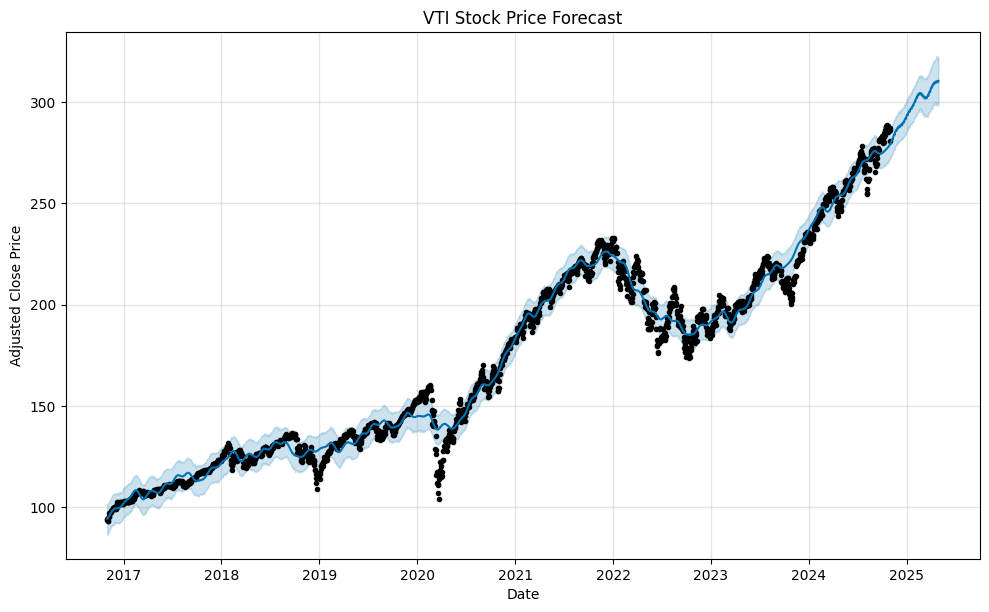

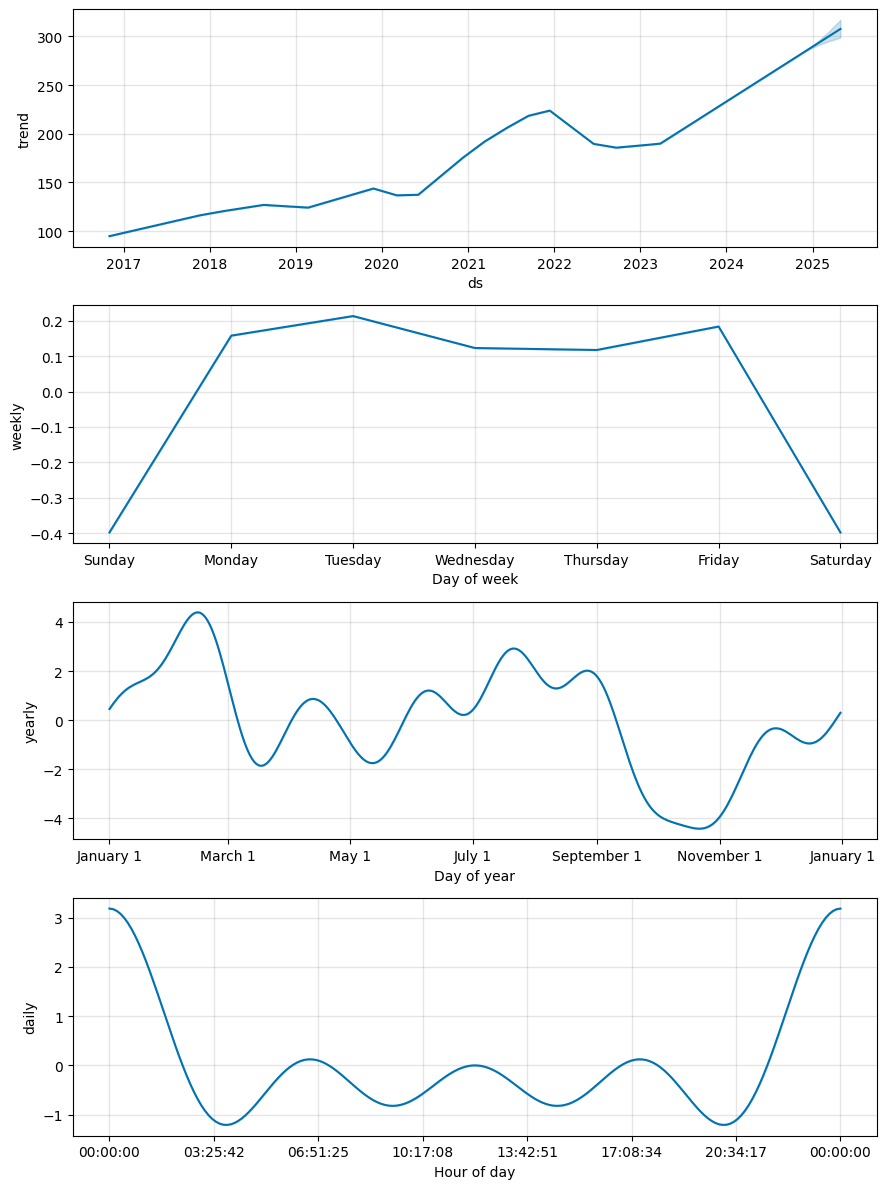

In [35]:
# Import required libraries
import yfinance as yf
from prophet import Prophet  # Prophet needs to be installed with 'pip install prophet'
import pandas as pd
import matplotlib.pyplot as plt

# Set parameters for downloading data
ticker = "VTI"  # Replace with any ticker symbol you want to forecast
start_date = "2016-11-01"
end_date = "2024-11-01"

# Download historical data using yfinance
data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

# Prepare data for Prophet
df = data[['Adj Close']].reset_index()  # Use 'Adj Close' as the target variable
df.columns = ['ds', 'y']  # Rename columns to fit Prophet's expected input

# Remove timezone information
df['ds'] = df['ds'].dt.tz_localize(None)  # Convert to timezone-naive

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(df)

# Make a future DataFrame for forecasting (e.g., 365 days into the future)
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title(f"{ticker} Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.show()

# Optional: Plot forecast components
model.plot_components(forecast)
plt.show()

